<a href="https://www.kaggle.com/code/mustafacihadgoktepe/cifar10-cnn?scriptVersionId=108373830" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print('Shape of x_train is: {}'.format(x_train.shape))
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of x_test is: {}'.format(x_test.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (50000, 32, 32, 3)
Shape of y_train is: (50000, 1)
Shape of x_test is: (10000, 32, 32, 3)
Shape of y_test is: (10000, 1)


In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
x_train.max()

255

In [6]:
x_train.min()

0

In [7]:
np.isnan(x_train).any()

False

In [8]:
np.isnan(x_test).any()

False

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


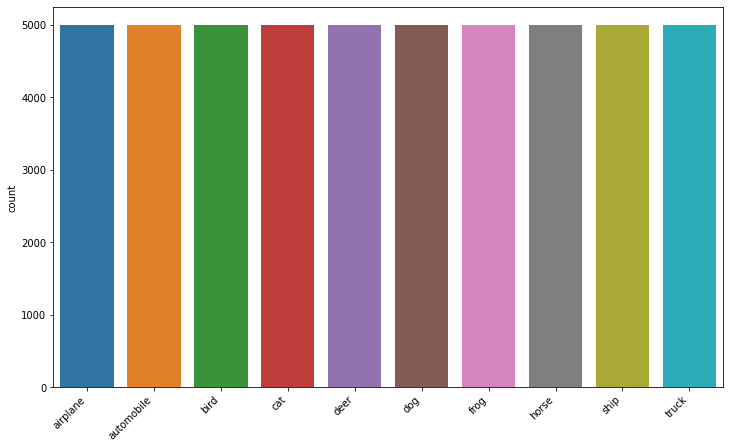

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,7));
g = sns.countplot(y_train);
g.set_xticklabels(classes, rotation=45, horizontalalignment='right');

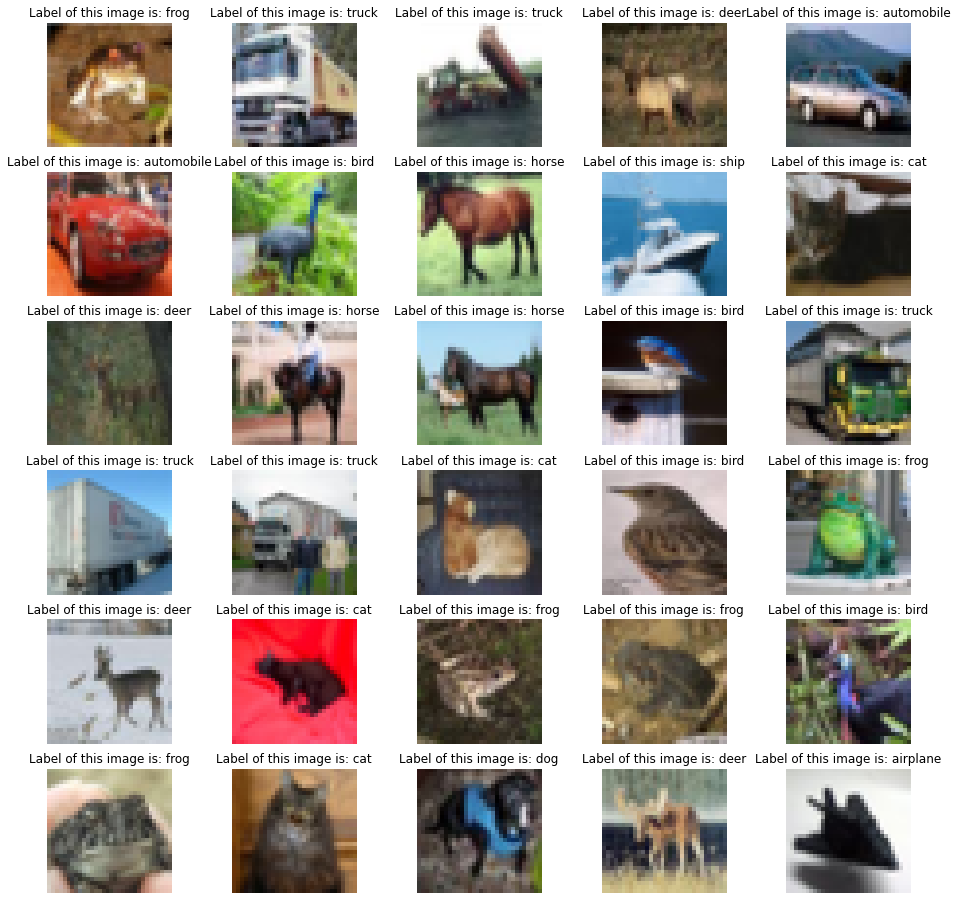

In [13]:
plt.figure(figsize=(16,16))
plt.tight_layout()

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.axis('off')
    plt.title('Label of this image is: ' + str(classes[y_train[i]]))
    plt.imshow(x_train[i])
    #plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

2022-10-17 17:45:05.964856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 17:45:06.084606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 17:45:06.085385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 17:45:06.086581: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          2

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0.001,
                                                  patience=10,
                                                  restore_best_weights=True)

lr_sch = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience= 5,
                                              factor = np.sqrt(0.2), verbose = 1,
                                              min_lr = 5e-10)

In [16]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stopping, lr_sch])

2022-10-17 17:45:34.758906: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-17 17:45:36.827792: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1407/1407 [==============================] - 17s 6ms/step - loss: 1.7535 - sparse_categorical_accuracy: 0.3835 - val_loss: 1.4547 - val_sparse_categorical_accuracy: 0.4654
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3321 - sparse_categorical_accuracy: 0.5214 - val_loss: 1.1341 - val_sparse_categorical_accuracy: 0.5910
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1584 - sparse_categorical_accuracy: 0.5882 - val_loss: 1.2168 - val_sparse_categorical_accuracy: 0.5692
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0524 - sparse_categorical_accuracy: 0.6319 - val_loss: 0.8830 - val_sparse_categorical_accuracy: 0.6940
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9751 - sparse_categorical_accuracy: 0.6610 - val_loss: 0.9364 - val_sparse_categorical_accuracy: 0.6814
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9210 - sparse_cat

In [17]:
history_df = pd.DataFrame(history.history)
history_df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr
0,1.753530,0.383489,1.454706,0.4654,0.001000
1,1.332067,0.521400,1.134126,0.5910,0.001000
2,1.158400,0.588178,1.216777,0.5692,0.001000
3,1.052354,0.631911,0.882988,0.6940,0.001000
4,0.975148,0.661022,0.936386,0.6814,0.001000
5,0.921014,0.679000,0.780951,0.7360,0.001000
6,0.870247,0.694489,0.970140,0.6634,0.001000
7,0.837738,0.708444,0.854894,0.7120,0.001000
8,0.803321,0.720733,0.811378,0.7176,0.001000
9,0.772325,0.728022,0.721336,0.7546,0.001000


<AxesSubplot:title={'center':'Accuracy'}>

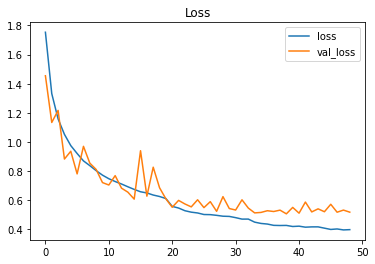

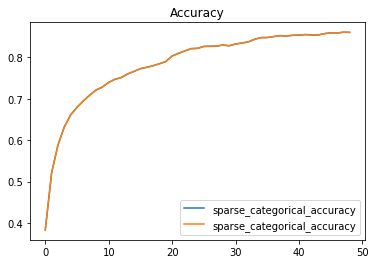

In [19]:
history_df.loc[:,['loss', 'val_loss']].plot(title= 'Loss')
history_df.loc[:, ['sparse_categorical_accuracy', 'sparse_categorical_accuracy']].plot(title= 'Accuracy')

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5411 - sparse_categorical_accuracy: 0.8195


[0.5410674214363098, 0.8195000290870667]

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred_classes = np.argmax(y_pred,axis = 1)
y_pred_classes

array([3, 8, 8, ..., 5, 1, 7])

In [23]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_test, y_pred_classes, average='weighted'),
    recall_score(y_test, y_pred_classes, average='weighted'),
    f1_score(y_test, y_pred_classes, average='weighted')))

Precision score is: 0.818771 
Recall score is: 0.819500 
f1 score is: 0.818528


In [25]:
from sklearn.metrics import classification_report

report_mnist = pd.DataFrame(classification_report(y_test, y_pred_classes,
                                                output_dict=True))
report_mnist

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.826422,0.906771,0.809851,0.664916,0.780728,0.707246,0.835238,0.871457,0.882187,0.902893,0.8195,0.818771,0.818771
recall,0.857000,0.924000,0.707000,0.633000,0.794000,0.732000,0.877000,0.861000,0.936000,0.874000,0.8195,0.819500,0.819500
f1-score,0.841433,0.915305,0.754939,0.648566,0.787308,0.719410,0.855610,0.866197,0.908297,0.888211,0.8195,0.818528,0.818528
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8195,10000.000000,10000.000000


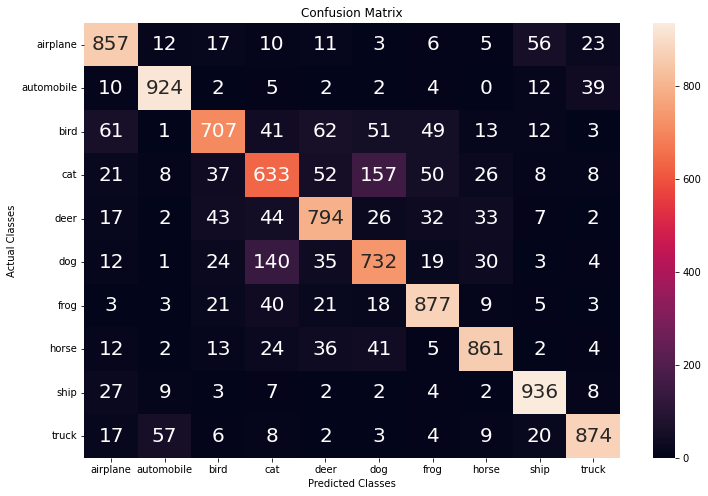

In [27]:
from sklearn.metrics import confusion_matrix

cm_cifar10 = pd.DataFrame(confusion_matrix(y_test, y_pred_classes), columns=classes, index=classes)

plt.figure(figsize = (12,8))
p = sns.heatmap(cm_cifar10, annot=True, annot_kws={'size': 20}, fmt='g');
p.set_title('Confusion Matrix');
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

Thanks for reading.